<a target="_blank" href="https://colab.research.google.com/github/skojaku/adv-net-sci/blob/main/notebooks/exercise-m04-friendship-paradox.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Degree distribution

![](https://barabasi.com/img/6/159.png)

Understanding degree distribution is the first key step to understand networks! And often, we want to see how the degree distribution looks like by plotting it like using histogram. But, it is not as easy as it may seem...

## Visualization basics

To learn the basics of data visualization, please take a [pen and paper exercise](pen-and-paper-friendship-paradox/main.pdf).

## Plotting degree distribution


We will first introduce a formal definition of the degree distribution. Then, we will learn how to plot the degree distribution of a network.

The degree of a node $i$, denoted by $d_i$, is the number of edges connected to it. With the adjacency matrix $A$, the degree of node $i$ is given by:

$$
d_i = \sum_{j=1}^N A_{ij}.
$$

The degree distribution $p(d)$ is the probability that a node has $d$ edges.

Let us compute the degree distribution of a network. We will create a Barabási-Albert network with $N=10,000$ nodes and $m=1$ edge per node.

In [1]:
import igraph
g = igraph.Graph.Barabasi(n = 10000, m = 1) # Create a Barabási-Albert network
A = g.get_adjacency() # Get the adjacency matrix

Compute the degree of each node by summing the elements of the adjacency matrix along the rows.

In [2]:
import numpy as np
deg = np.sum(A, axis=1)
deg = deg.flatten()

The degree distribution $p(d)$ can be computed by counting the number of nodes with each degree and dividing by the total number of nodes.

In [3]:
p_deg = np.bincount(deg) / len(deg)

Let us plot the degree distribution. This is not as trivial as you might think... 🤔

Text(0, 0.5, 'Probability')

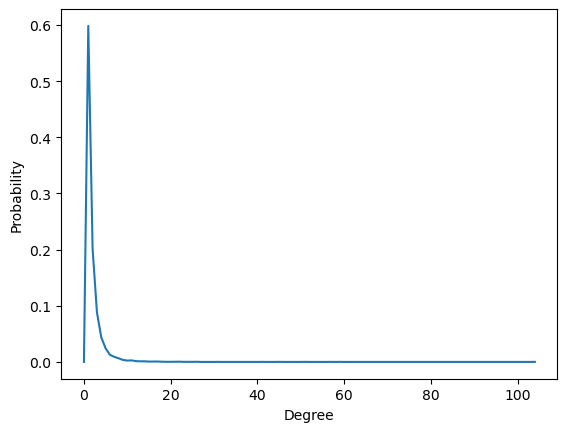

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x=np.arange(len(p_deg)), y=p_deg)
ax.set_xlabel('Degree')
ax.set_ylabel('Probability')

While it clearly shows that most nodes have small degree, it does not show the tail of the distribution clearly, and often it is this tail that is of great interest (e.g., hub nodes). To show the tail of the distribution more clearly, we can use a log-log plot.

Text(0, 0.5, 'Probability')

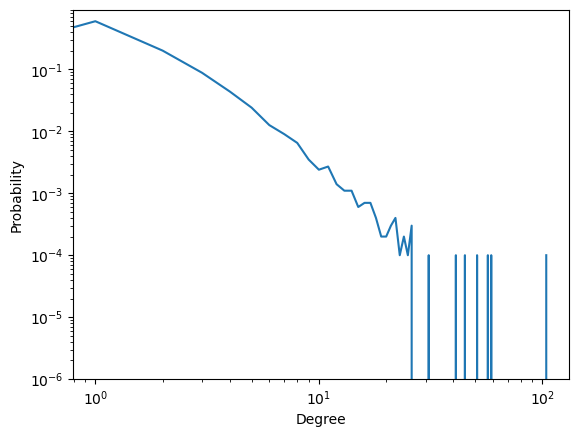

In [5]:
ax = sns.lineplot(x=np.arange(len(p_deg)), y=p_deg)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(np.min(p_deg[p_deg>0])*0.01, None)
ax.set_xlabel('Degree')
ax.set_ylabel('Probability')

We see fluctuations for large degree nodes because of the small number of nodes with large degree.
One can use "binning" to smooth the plot. Binning involves grouping the data into bins and calculating the fraction of data within each bin. However, selecting an appropriate bin size can be challenging, and even with a well-chosen bin size, some information may be lost.

A more convenient way is to use the complementary cumulative distribution function (CCDF).
The CCDF at degree $d$ is the probability that a randomly chosen node has degree $d'$ greater than $d$ ($d' > d$).

$$
\text{CCDF}(d) = P(d' > d) = \sum_{d'=d+1}^\infty p(d')
$$

- CCDF is a monotonically decreasing function of $d$.
- CCDF encompasses the full information of $p(d)$, i.e., taking the derivative of CCDF gives $p(d)$.
- CCDF can be plotted as a smooth curve on a log-log scale without binning.

Text(0, 0.5, 'CCDF')

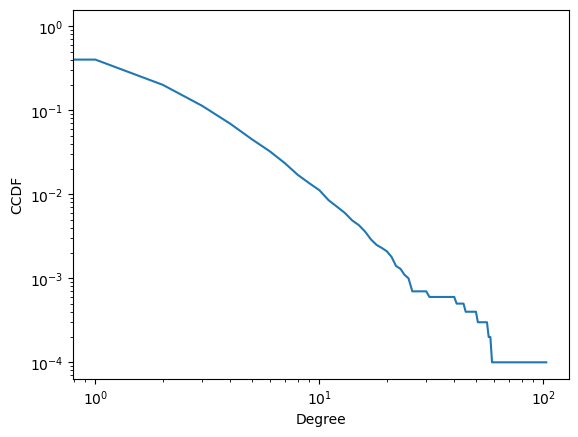

In [6]:
ccdf_deg = 1 - np.cumsum(p_deg)[:-1] # 1 - CDF (cumulative distribution function).
# The last element is excluded because it is always 1, resulting in CCDF=0, which cannot be plotted on a log-log scale.

ax = sns.lineplot(x=np.arange(len(ccdf_deg)), y=ccdf_deg)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('CCDF')

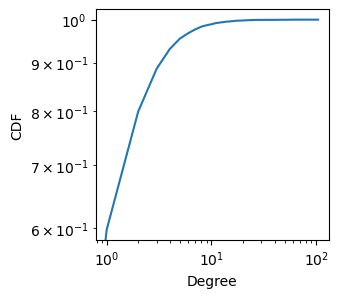

In [7]:
from myst_nb import glue

cdf_deg = np.cumsum(p_deg)
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.lineplot(x=np.arange(len(cdf_deg)), y=cdf_deg, ax = ax)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Degree')
ax.set_ylabel('CDF')
glue("cdf_fig", fig, display=False)

:::{note}
CCDF is the complement of CDF (cumulative distribution function). We use CCDF instead of CDF because CCDF shows the tail of the distribution more clearly in a log-log plot.
Specifically, a logarithmic scale enlarges the range of small values, while compressing the range of large values.
In CDF (shown in the figure below), large degree nodes have CDF values close to 1, and thus, the tail of the distribution is compressed into a small range.
In CCDF, on the other hand, large degree nodes have a small CCDF values, which are then enlarged and thus more visible.
For a visual comparison of CCDF and CDF, refer to Figure 3 in {footcite}`newman2005power`, or [the arxiv version](https://arxiv.org/pdf/cond-mat/0412004).
```{glue} cdf_fig
:align: center
```
:::

The slope of the CCDF tells us the heterogeneity of the degree distribution.
- Steep slope: more **homogeneous** degree distribution (similar degrees)
- Flat slope: more **heterogeneous** degree distribution (wide range of degrees)


The slope of the CCDF is related to the power-law exponent of the degree distribution.
A power-law degree distribution is described by *a continuous distribution* with the *density function* (not the probability mass) $p(d)$ given by {footcite}`clauset2009power`:

$$
p(d) = \frac{\gamma-1}{d_{\min}} \left( \frac{d}{d_{\min}} \right)^{-\gamma}
$$

where:
- $p(d)$ is the probability *density* of a node having degree $d$
- $\gamma$ is the power-law exponent
- $d_{\min}$ is the minimum degree


:::{note}
The degree distribution is *discrete* but often approximated by a *continuous* distribution for mathematical convenience. While generally accurate, caution is needed as the reliability varies depending on the range of the degrees. See {footcite}`clauset2009power` for more details.
:::

:::{note}
The power-law distribution is ill-defined for $d=0$, which is why there must be a minimum degree $d_{\min}$ to avoid this issue.
:::

:::{note}
There has been a long-standing debate in network science as to whether the power-law well represents the real-world networks. Power-law is just one of many possible distributions with a heavy tail (i.e., a long tail on the right side of the distribution), and other distributions may also fit the data well such as log-normal distribution.
This discussion is critical as many theories in network science are built on the assumption of the form of the degree distribution. See {footcite}`artico2020rare,holme2019rare,voitalov2019scale,barabasi2003scale` for the debate.
:::

The CCDF for the power-law distribution is given by:

$$
\begin{aligned}
\text{CCDF}(d) &= 1 - \int_{d_{\min}}^d p(x) {\rm d}x \\
  &= 1 - \frac{\gamma -1}{d_{\min}}\cdot \frac{1}{1 - \gamma} \left[
\left(\frac{d^{-\gamma + 1}}{d_{\min}^{-\gamma}}\right) - \left(\frac{d_{\min} ^{-\gamma + 1}}{d_{\min} ^{-
\gamma}}\right)\right] \\
&= \left( \frac{d}{d_{\min}}\right)^{-\gamma + 1}
\end{aligned}
$$

Taking the logarithm:

$$
\log \left[ \text{CCDF}(d) \right] = (-\gamma + 1) \cdot \log d + \text{const.}
$$

Thus, the slope of the CCDF in a log-log plot is related to the power-law exponent $\gamma$.
Specifically, a steeper negative slope (i.e., a more negative value of $-\gamma + 1$) corresponds to a larger $\gamma$.
A larger $\gamma$ indicates a more homogeneous degree distribution, where the probability of finding nodes with very high degrees decreases more rapidly.
Conversely, a flatter slope (i.e., a value of $-\gamma + 1$ being closer to zero) corresponds to a smaller $\gamma$.
A smaller $\gamma$ indicates a more heterogeneous degree distribution, where there's a high probability of finding nodes with high degrees compared to that with a large $\gamma$ value.

For students interested in real-world examples of the CCDF plot, refer to Figure 4 in {footcite}`newman2005power`, or [the arxiv version](https://arxiv.org/pdf/cond-mat/0412004)

In sum, the CCDF in a log-log plot provides a convenient visual summary of the degree distribution, with the slope of the CCDF providing a measure of the heterogeneity of the degree distribution.

```{footbibliography}
```